In [4]:
# importing important libraries for data cleaning, wrangling, EDA, and visualisation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Setting options for pandas
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 110530)

# Setting options to expand the display of the dataframe
pd.set_option('display.expand_frame_repr', True)

# Setting option to prevent scilent downcasting 
pd.set_option('future.no_silent_downcasting', True)

# Customer_churn_dataset

In [6]:
# read csv file
df_churn = pd.read_csv('./customer_churn_dataset_classification_dataset.csv')

In [7]:
df_churn.head(20)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0
5,8.0,51.0,Male,33.0,25.0,9.0,26.0,Premium,Annual,129.0,8.0,1.0
6,9.0,58.0,Female,49.0,12.0,3.0,16.0,Standard,Quarterly,821.0,24.0,1.0
7,10.0,55.0,Female,37.0,8.0,4.0,15.0,Premium,Annual,445.0,30.0,1.0
8,11.0,39.0,Male,12.0,5.0,7.0,4.0,Standard,Quarterly,969.0,13.0,1.0
9,12.0,64.0,Female,3.0,25.0,2.0,11.0,Standard,Quarterly,415.0,29.0,1.0


In [8]:
df_churn.shape

(440833, 12)

In [9]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [10]:
df_churn.isnull().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [11]:
df_churn.dropna(inplace=True)

In [12]:
df_churn.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [13]:
df_churn.duplicated().sum()

0

In [14]:
df_churn.nunique()

CustomerID           440832
Age                      48
Gender                    2
Tenure                   60
Usage Frequency          30
Support Calls            11
Payment Delay            31
Subscription Type         3
Contract Length           3
Total Spend           68363
Last Interaction         30
Churn                     2
dtype: int64

In [15]:
# Summarizing the Categorical columns
df_churn.describe(include=['object']).T

,count,unique,top,freq
Gender,440832,2,Male,250252
Subscription Type,440832,3,Standard,149128
Contract Length,440832,3,Annual,177198


In [16]:
# Summarizing the numerical columns
df_churn.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,440832.0,225398.667955,129531.918550,2.0,113621.75,226125.5,337739.25,449999.0
Age,440832.0,39.373153,12.442369,18.0,29.00,39.0,48.00,65.0
Tenure,440832.0,31.256336,17.255727,1.0,16.00,32.0,46.00,60.0
Usage Frequency,440832.0,15.807494,8.586242,1.0,9.00,16.0,23.00,30.0
Support Calls,440832.0,3.604437,3.070218,0.0,1.00,3.0,6.00,10.0
Payment Delay,440832.0,12.965722,8.258063,0.0,6.00,12.0,19.00,30.0
Total Spend,440832.0,631.616223,240.803001,100.0,480.00,661.0,830.00,1000.0
Last Interaction,440832.0,14.480868,8.596208,1.0,7.00,14.0,22.00,30.0
Churn,440832.0,0.567107,0.495477,0.0,0.00,1.0,1.00,1.0


In [17]:
df_churn.corr(numeric_only=True)

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
CustomerID,1.000000,-0.181977,0.044129,0.038455,-0.482894,-0.262029,0.359289,-0.125356,-0.839365
Age,-0.181977,1.000000,-0.011630,-0.007190,0.158451,0.061738,-0.084684,0.028980,0.218394
Tenure,0.044129,-0.011630,1.000000,-0.026800,-0.027640,-0.016588,0.019006,-0.006903,-0.051919
Usage Frequency,0.038455,-0.007190,-0.026800,1.000000,-0.022013,-0.014470,0.018631,-0.004662,-0.046101
Support Calls,-0.482894,0.158451,-0.027640,-0.022013,1.000000,0.162889,-0.221594,0.077684,0.574267
Payment Delay,-0.262029,0.061738,-0.016588,-0.014470,0.162889,1.000000,-0.121044,0.042708,0.312129
Total Spend,0.359289,-0.084684,0.019006,0.018631,-0.221594,-0.121044,1.000000,-0.056890,-0.429355
Last Interaction,-0.125356,0.028980,-0.006903,-0.004662,0.077684,0.042708,-0.056890,1.000000,0.149616
Churn,-0.839365,0.218394,-0.051919,-0.046101,0.574267,0.312129,-0.429355,0.149616,1.000000


In [18]:
# Dropping CustomerID since it has no real value or meaning in our analysis
df_churn = df_churn.drop('CustomerID', axis=1)
df_churn.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [19]:
# Changing data types from float64 to int64 since all values are whole numbers 
df_churn[df_churn.select_dtypes(include='float64').columns] = df_churn.select_dtypes(include='float64').round().astype('int64')

In [20]:
# Displaying the first 5 unique values of each column to understand the data better
for col in df_churn.columns:
    print(f'{col}: {df_churn[col].unique()[:5]}')

Age: [30 65 55 58 23]
Gender: ['Female' 'Male']
Tenure: [39 49 14 38 32]
Usage Frequency: [14  1  4 21 20]
Support Calls: [ 5 10  6  7  9]
Payment Delay: [18  8  7 26 16]
Subscription Type: ['Standard' 'Basic' 'Premium']
Contract Length: ['Annual' 'Monthly' 'Quarterly']
Total Spend: [932 557 185 396 617]
Last Interaction: [17  6  3 29 20]
Churn: [1 0]


## Feature Engineering

In [21]:
df_churn = pd.get_dummies(df_churn, drop_first=True)
df_churn.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Male,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Monthly,Contract Length_Quarterly
0,30,39,14,5,18,932,17,1,False,False,True,False,False
1,65,49,1,10,8,557,6,1,False,False,False,True,False
2,55,14,4,6,18,185,3,1,False,False,False,False,True
3,58,38,21,7,7,396,29,1,True,False,True,True,False
4,23,32,20,5,8,617,20,1,True,False,False,True,False


### Applying ML models for Classification

In [22]:
# Now for machine learning, we will import the necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [23]:
x_churn = X = df_churn.drop(columns=['Churn'])
y_churn = df_churn['Churn']

# Split data
x_churn_train, x_churn_test, y_churn_train, y_churn_test = train_test_split(x_churn, y_churn, test_size=0.2, random_state=42)

# Scale data
x_churn_train = scaler.fit_transform(x_churn_train)
x_churn_test = scaler.transform(x_churn_test)

In [87]:
# Importing all needed lib
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

# Import used metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [91]:
# 1.KNN Classifier
knnc = KNeighborsClassifier()
knnc_params = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}
knnc_grid = GridSearchCV(knnc, knnc_params, cv=5, scoring='accuracy', n_jobs=-1)
print('fitting knn model...\n')
knnc_grid.fit(x_churn_train, y_churn_train)
print(
    f'KNN best Paramaters: {knnc_grid.best_params_}'
)
y_pred_knnc = knnc_grid.predict(x_churn_test)
print(
f'''KNN Accuracy: {accuracy_score(y_churn_test, y_pred_knnc)}
confusion matrix: {confusion_matrix(y_churn_test, y_pred_knnc)}
classification_report: {classification_report(y_churn_test, y_pred_knnc)}
'''
)

# 2. Logestic Regression
lgr = LogisticRegression()
lgr_params = {
    'C': [0.1, 1.0, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}
lgr_grid = GridSearchCV(lgr, lgr_params, cv=5, scoring='accuracy', n_jobs=-1)
print(
    'Fitting Linear Regression Classifier...\n'
)
lgr_grid.fit(x_churn_train, y_churn_train)
print(f'logestic regression best paramaters: {lgr_grid.best_params_}')

y_pred_lgr = lgr_grid.predict(x_churn_test)
print(
f'''logestic regression Accuracy: {accuracy_score(y_churn_test, y_pred_lgr)}
confusion matrix: {confusion_matrix(y_churn_test, y_pred_lgr)}
classification_report: {classification_report(y_churn_test, y_pred_lgr)}
'''
)

# 3. Decision Tree
dtc = DecisionTreeClassifier()
dtc_params = {
    'max_depth': [3, 5, 10],
    'criterion': ['gini', 'entropy']
}
dtc_grid = GridSearchCV(dtc, dtc_params, cv=5, scoring='accuracy', n_jobs=-1)
print('Fitting Decision Tree Classifier...\n')
dtc_grid.fit(x_churn_train, y_churn_train)
print(f'Decision Tree best parameters: {dtc_grid.best_params_}')

y_pred_dtc = dtc_grid.predict(x_churn_test)
print(
f'''Decision Tree Accuracy: {accuracy_score(y_churn_test, y_pred_dtc)}
confusion matrix: {confusion_matrix(y_churn_test, y_pred_dtc)}
classification_report: {classification_report(y_churn_test, y_pred_dtc)}
'''
)

# 4. Random Forest Classifier
rfc = RandomForestClassifier()
rfc_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10]
}
rfc_grid = GridSearchCV(rfc, rfc_params, cv=5, scoring='accuracy', n_jobs=-1)
print('Fitting Random forest Classifier...\n')

rfc_grid.fit(x_churn_train, y_churn_train)
print(f'Random Forest Best Paramaters: {rfc_grid.best_params_}')

y_pred_rfc = rfc_grid.predict(x_churn_test)
print(
f'''Random Forest Accuracy: {accuracy_score(y_churn_test, y_pred_rfc)}
confusion matrix: {confusion_matrix(y_churn_test, y_pred_rfc)}
classification_report: {classification_report(y_churn_test, y_pred_rfc)}
'''
)

# 5. Gradient Boosting Classifier
gbc = GradientBoostingClassifier()
gbc_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}
gbc_grid = GridSearchCV(gbc, gbc_params, cv=5, scoring='accuracy', n_jobs=-1)
print('Fitting Gradient Boosting Classifier Model...\n')

gbc_grid.fit(x_churn_train, y_churn_train)
print(f'Gradient Boosting Classifier best paramaters: {gbc_grid.best_params_}')

y_pred_gbc = gbc_grid.predict(x_churn_test)

print(
f'''Gradient Boosting Classifier Accuracy: {accuracy_score(y_churn_test, y_pred_gbc)}
confusion matrix: {confusion_matrix(y_churn_test, y_pred_gbc)}
classification_report: {classification_report(y_churn_test, y_pred_gbc)}
'''
)

# 6. Naive Bayes
nb = GaussianNB()
print('Fitting Naive Bayes Model...\n')
nb.fit(x_churn_train, y_churn_train)

y_pred_nb = nb.predict(x_churn_test)
print(
f'''Naive Bayes Accuracy: {accuracy_score(y_churn_test, y_pred_nb)}
confusion matrix: {confusion_matrix(y_churn_test, y_pred_nb)}
classification_report: {classification_report(y_churn_test, y_pred_nb)}
'''
)

fitting knn model...

KNN best Paramaters: {'n_neighbors': 3, 'weights': 'distance'}
KNN Accuracy: 0.9607903183730875
confusion matrix: [[37860   203]
 [ 3254 46850]]
classification_report:               precision    recall  f1-score   support

           0       0.92      0.99      0.96     38063
           1       1.00      0.94      0.96     50104

    accuracy                           0.96     88167
   macro avg       0.96      0.96      0.96     88167
weighted avg       0.96      0.96      0.96     88167


Fitting Linear Regression Classifier...

logestic regression best paramaters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
logestic regression Accuracy: 0.8964351741581317
confusion matrix: [[34561  3502]
 [ 5629 44475]]
classification_report:               precision    recall  f1-score   support

           0       0.86      0.91      0.88     38063
           1       0.93      0.89      0.91     50104

    accuracy                           0.90     88167
   macro avg       

## Applying DL

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout

In [34]:
# Building the model
ishape = x_churn_train.shape[1]

model = Sequential([
    Input(shape=(ishape,)),
    Dense(16, activation='relu'),
    # Dropout(0.3),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

In [35]:
# Training and using binary_crossentropy as advised for binary cllassification
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# we added history for plotting the training curve
history = model.fit(x_churn_train, y_churn_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
8817/8817 ━━━━━━━━━━━━━━━━━━━━ 57s 6ms/step - accuracy: 0.9233 - loss: 0.1768 - val_accuracy: 0.9891 - val_loss: 0.0362
Epoch 2/30
8817/8817 ━━━━━━━━━━━━━━━━━━━━ 76s 5ms/step - accuracy: 0.9905 - loss: 0.0313 - val_accuracy: 0.9944 - val_loss: 0.0218
Epoch 3/30
8817/8817 ━━━━━━━━━━━━━━━━━━━━ 75s 5ms/step - accuracy: 0.9946 - loss: 0.0196 - val_accuracy: 0.9950 - val_loss: 0.0170
Epoch 4/30
8817/8817 ━━━━━━━━━━━━━━━━━━━━ 42s 5ms/step - accuracy: 0.9957 - loss: 0.0156 - val_accuracy: 0.9964 - val_loss: 0.0135
Epoch 5/30
8817/8817 ━━━━━━━━━━━━━━━━━━━━ 42s 5ms/step - accuracy: 0.9959 - loss: 0.0137 - val_accuracy: 0.9955 - val_loss: 0.0140
Epoch 6/30
8817/8817 ━━━━━━━━━━━━━━━━━━━━ 43s 5ms/step - accuracy: 0.9963 - loss: 0.0126 - val_accuracy: 0.9949 - val_loss: 0.0149
Epoch 7/30
8817/8817 ━━━━━━━━━━━━━━━━━━━━ 81s 5ms/step - accuracy: 0.9961 - loss: 0.0122 - val_accuracy: 0.9955 - val_loss: 0.0133
Epoch 8/30
8817/8817 ━━━━━━━━━━━━━━━━━━━━ 45s 5ms/step - accuracy: 0.9964 - loss: 0

In [36]:
loss, accuracy = model.evaluate(x_churn_test, y_churn_test)
print(
    f'''
    Test Accuracy: {accuracy:.4f}
    Test Loss: {loss:.4f}
    '''
    )

2756/2756 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9981 - loss: 0.0054

    Test Accuracy: 0.9983
    Test Loss: 0.0050
    


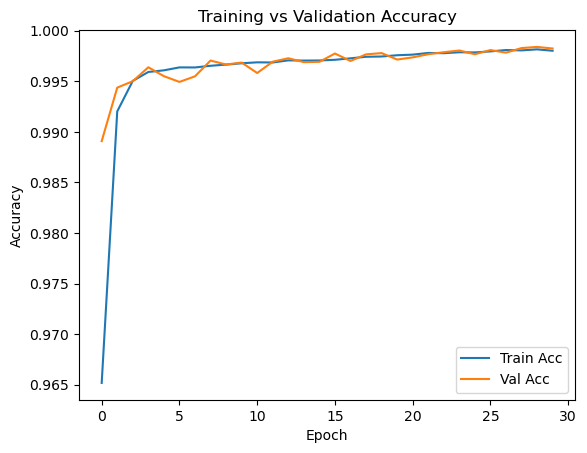

In [ ]:
# Plotting training and validation acc

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()